In [4]:
#Load and preprocess the Wisconsin Diagnostic Breast Cancer (WDBC) dataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, roc_auc_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
column_names = ['ID', 'Diagnosis'] + [f'feature_{i}' for i in range(1, 31)]
df = pd.read_csv(url, header=None, names=column_names)

# Drop the ID column
df.drop(columns=['ID'], inplace=True)

# Map Diagnosis to binary values
df['Diagnosis'] = df['Diagnosis'].map({'M': 1, 'B': 0})

# Split the data into features and target
X = df.drop(columns=['Diagnosis'])
y = df['Diagnosis']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train a Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Model Score:", model.score(X_test, y_test))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Model Score: 0.9736842105263158
Confusion Matrix:
[[70  1]
 [ 2 41]]
Accuracy: 0.9736842105263158
Recall: 0.9534883720930233
Precision: 0.9761904761904762
ROC-AUC: 0.9697019325253848
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



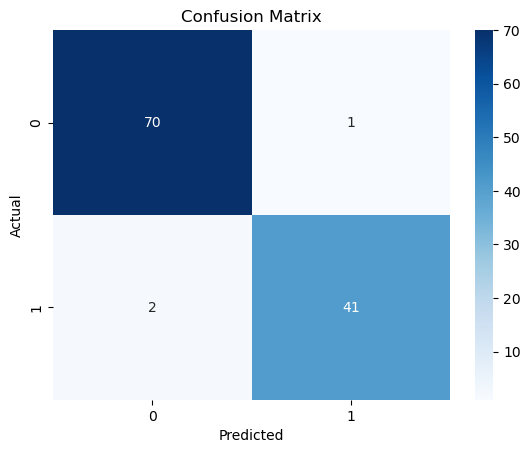

In [5]:
#Visualizations
# Confusion Matrix Heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [6]:
#Credit Card Risk Modeling
# Load the dataset
df_credit = pd.read_csv('German.csv')

# Drop the first column
df_credit.drop(columns=[df_credit.columns[0]], inplace=True)

# Rename the columns
column_names = ["chk_acct", "duration", "credit_his", "purpose", "amount", "saving_acct", "present_emp", "installment_rate", "sex", "other_debtor", "present_resid", "property", "age", "other_install", "housing", "n_credits", "job", "n_people", "telephone", "foreign", "response"]
df_credit.columns = column_names

# Modify the 'response' variable
df_credit['response'] = df_credit['response'] - 1
df_credit['response'] = df_credit['response'].astype('object')

# Summarize the dataset
print(df_credit.info())
print(df_credit.describe(include='all'))


FileNotFoundError: [Errno 2] No such file or directory: 'German.csv'

In [7]:
# Correlation matrix
corr_matrix = df_credit.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


NameError: name 'df_credit' is not defined

In [8]:
sns.countplot(x='installment_rate', hue='response', data=df_credit)
plt.title('Installment Rate vs Count by Response Type')
plt.show()


NameError: name 'df_credit' is not defined

In [9]:
sns.boxplot(x='response', y='age', data=df_credit)
plt.title('Age by Response Variable')
plt.show()


NameError: name 'df_credit' is not defined

In [10]:
sns.boxplot(x='response', y='duration', data=df_credit)
plt.title('Duration by Response Variable')
plt.show()


NameError: name 'df_credit' is not defined

In [11]:
sns.countplot(x='chk_acct', hue='response', data=df_credit)
plt.title('Checking Account vs Count by Response Type')
plt.show()


NameError: name 'df_credit' is not defined

In [12]:
sns.countplot(x='credit_his', hue='response', data=df_credit)
plt.title('Credit History vs Count by Response Type')
plt.show()


NameError: name 'df_credit' is not defined

In [ ]:
sns.countplot(x='saving_acct', hue='response', data=df_credit)
plt.title('Saving Account vs Count by Response Type')
plt.show()


In [ ]:
X = df_credit[['sex', 'housing', 'saving_acct', 'chk_acct', 'age', 'duration', 'amount']]
y = df_credit['response']

# One hot encoding for categorical variables
X = pd.get_dummies(X, columns=['sex', 'housing', 'saving_acct', 'chk_acct'], drop_first=True)

# Standardize numerical columns
scaler = StandardScaler()
X[['age', 'duration', 'amount']] = scaler.fit_transform(X[['age', 'duration', 'amount']])


In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


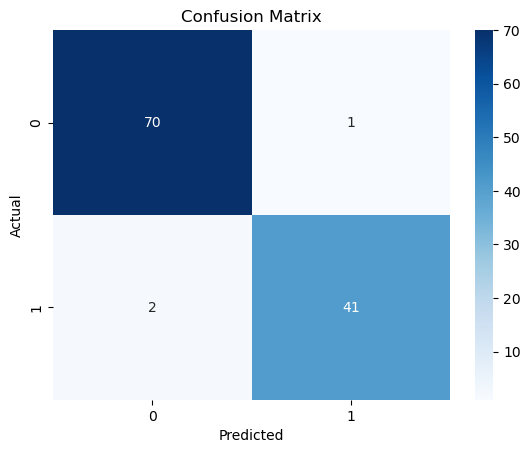

Accuracy: 0.9736842105263158
Recall: 0.9534883720930233
Precision: 0.9761904761904762
ROC-AUC: 0.9697019325253848


In [13]:
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Model Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred))


In [14]:
#SQL Table Creation and Queries
from sqlalchemy import create_engine, Column, Integer, String, Float, Table, MetaData
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.orm import sessionmaker

Base = declarative_base()

class BookCatalogue(Base):
    __tablename__ = 'book_catalogue'
    bookid = Column(Integer, primary_key=True)
    publisherid = Column(Integer)
    title = Column(String)
    author = Column(String)

class OrderTable(Base):
    __tablename__ = 'order_table'
    bookid = Column(Integer, primary_key=True)
    type = Column(String)
    author = Column(String)
    price = Column(Float)
    quantity = Column(Integer)

# Create an SQLite database and tables
engine = create_engine('sqlite:///books_orders.db')
Base.metadata.create_all(engine)

# Insert data into tables
Session = sessionmaker(bind=engine)
session = Session()

books_data = [
    BookCatalogue(bookid=348, publisherid=1, title='Autobiography', author='Malcolm X'),
    # (add other entries)
]

orders_data = [
    OrderTable(bookid=348, type='Autobiography', author='Malcolm X', price=523, quantity=8),
    # (add other entries)
]

session.add_all(books_data)
session.add_all(orders_data)
session.commit()
